In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder='desktop/crem'

In [3]:
dict_PB={}
for i in range(2010,2017):
    i=str(i)
    df=pd.read_excel(os.path.abspath('/Users/Roman/Desktop/CREM/SWISS ENERGY DATA/Subventions PR par canton et par an.xlsx'),sheetname=i)
    df['Année']=[i]*27
    dict_PB[i]=df

In [4]:
df_PB=dict_PB['2010']
for i in range (2011,2017):
    i=str(i)
    df_PB=df_PB.merge(dict_PB[i],how='outer')
    
df_PB=df_PB[df_PB['Région']!='Suisse']

In [5]:
df_PB

,Région,Montant accordé (en M CHF),Demandes de subvention acceptée,Année
0,Argovie,15.37,2454,2010
1,Appenzell RhodesIntérieures,0.72,76,2010
2,Appenzell RhodesExtérieures,1.97,302,2010
3,Berne,34.03,4851,2010
4,Bâle-Campagne,9.20,1301,2010
5,Bâle-Ville,4.40,525,2010
6,Fribourg,6.40,850,2010
7,Genève,8.92,750,2010
8,Glaris,1.72,235,2010
9,Grisons,9.89,1022,2010


<IPython.core.display.Javascript object>


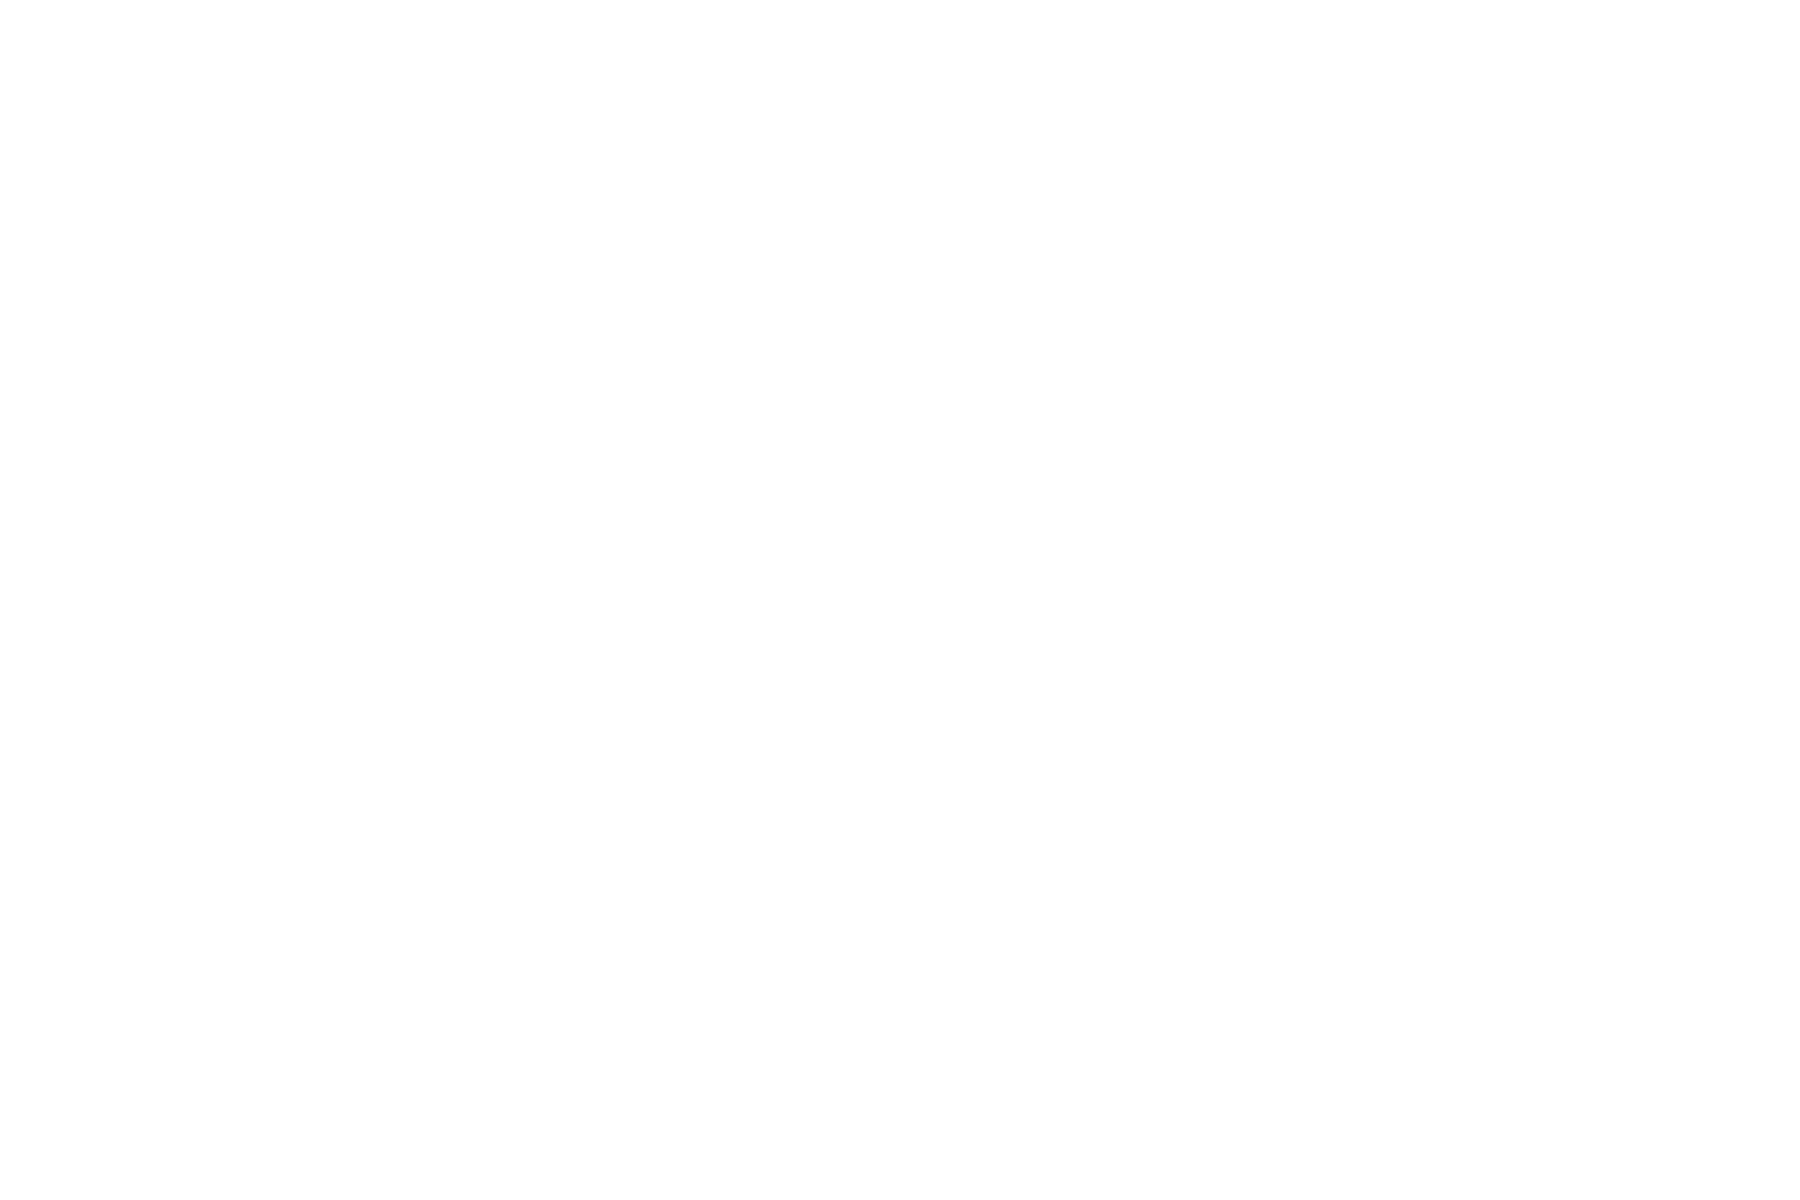

In [6]:
df=df_PB.groupby('Région').sum()
df.reset_index(inplace=True)

# Part des montants accordés par cantons depuis la création du Programme Bâtiment

%matplotlib notebook

tot=1071.81
X=df['Région'].index
Y=100*df['Montant accordé (en M CHF)']/tot
plt.figure('Part des montants accordés par canton',figsize=(9,6))
plt.bar(X,Y,alpha=0.7,color='black')
ticks=df['Région']
plt.xticks(X, ticks, rotation=90)
plt.grid(color='xkcd:silver')
plt.ylabel('Part en %')

<IPython.core.display.Javascript object>


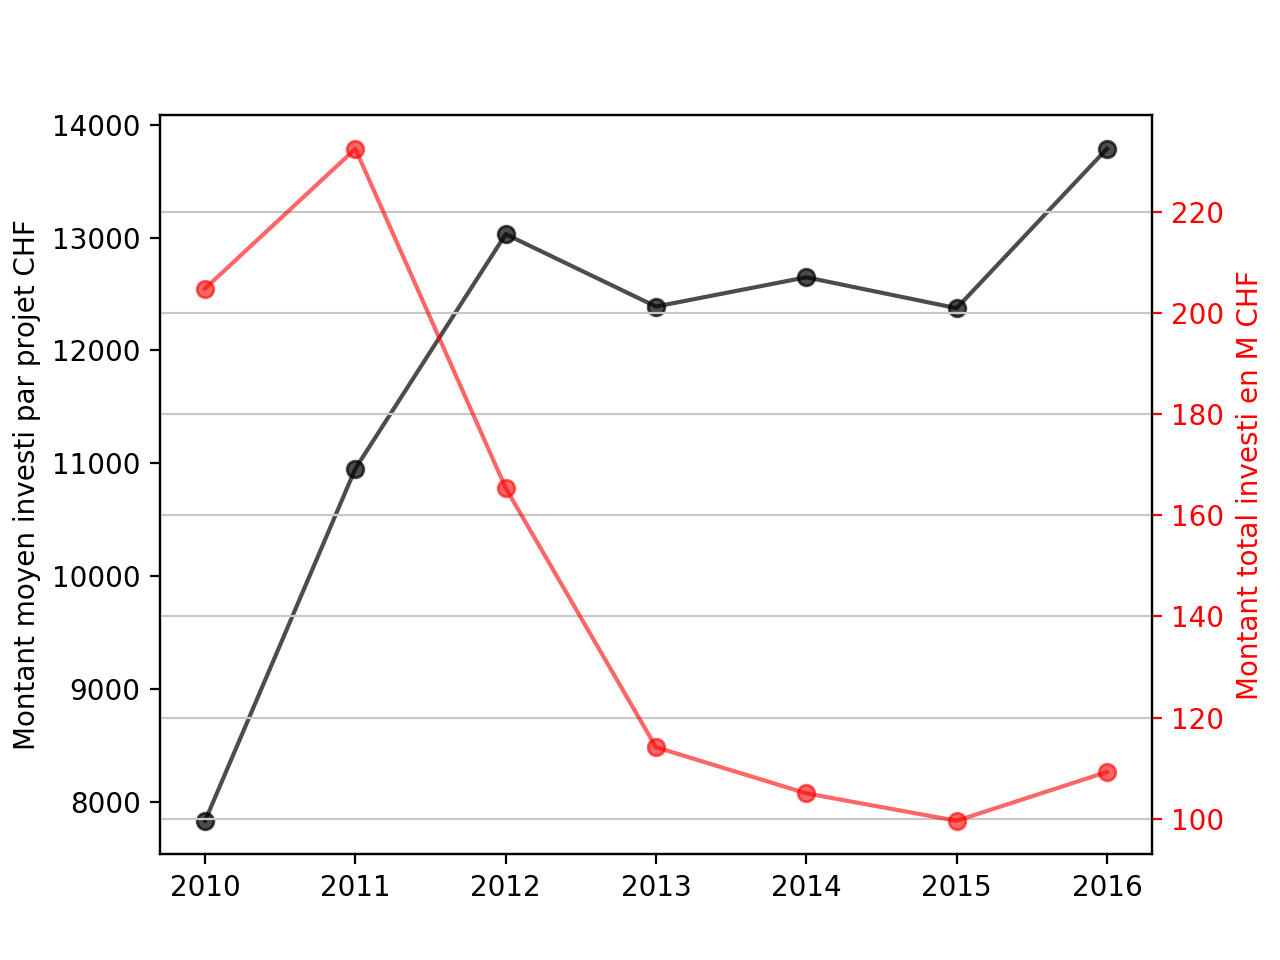

In [7]:
%matplotlib notebook

fig, ax1=plt.subplots()

ax1.plot(1e6*df_PB.groupby('Année').sum()['Montant accordé (en M CHF)']/df_PB.groupby('Année').sum()['Demandes de subvention acceptée'],'-o',alpha=0.7,color='black')
ax1.tick_params(axis='y')
plt.ylabel('Montant moyen investi par projet CHF')

ax2=ax1.twinx()
ax2.plot(df_PB.groupby('Année').sum()['Montant accordé (en M CHF)'],color='red',alpha=0.6,marker='o')
ax2.tick_params(axis='y',colors='red')

plt.grid(color='xkcd:silver')
plt.ylabel('Montant total investi en M CHF',color='red')
#plt.axis([2010,2016,0,15000])


<IPython.core.display.Javascript object>


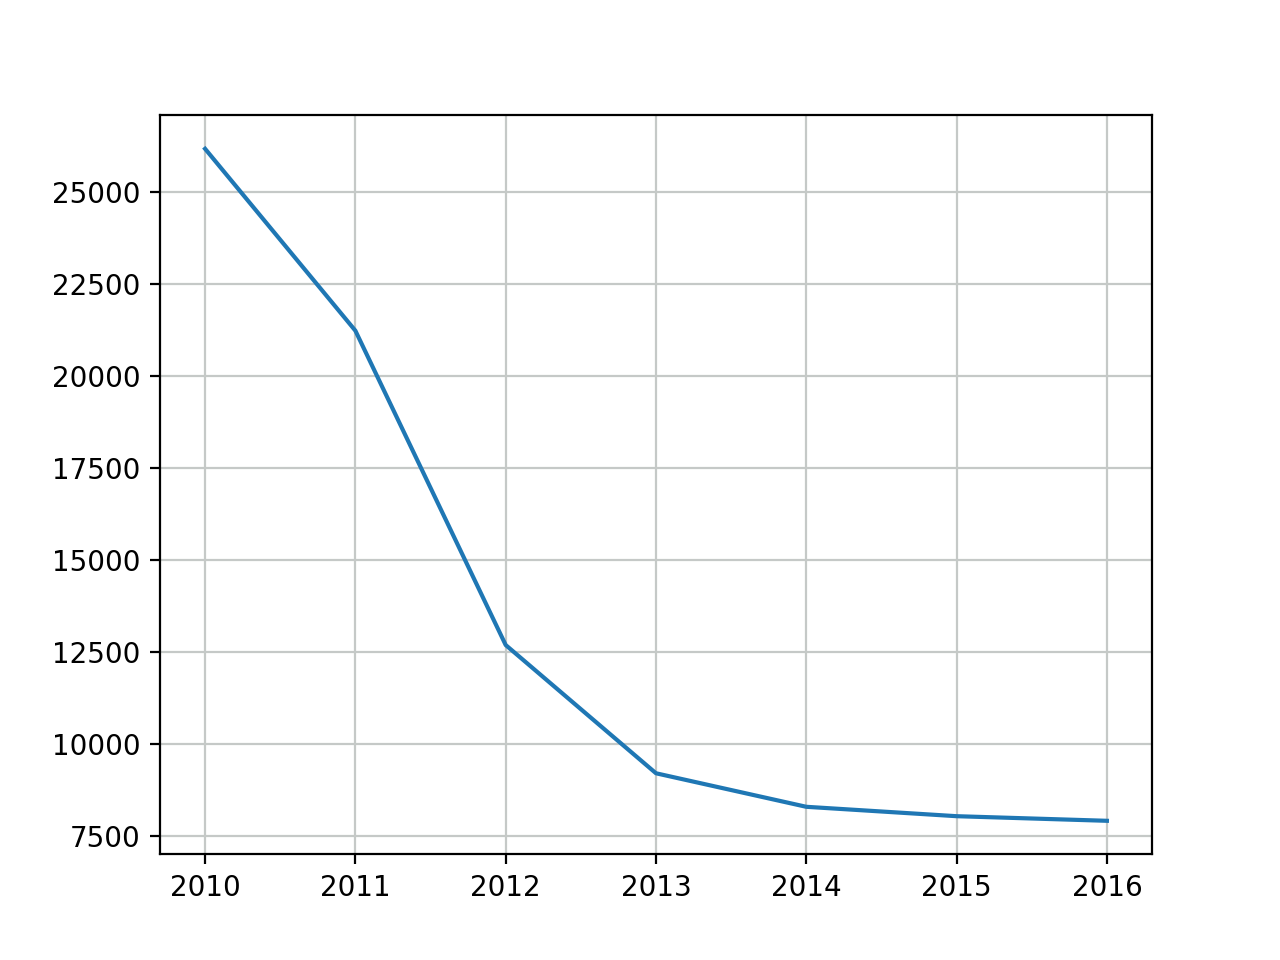

In [8]:
# Somme moyenne accordée par projet par an
plt.figure('Nombre de demandes de subvention accordées')
plt.plot(df_PB.groupby('Année').sum()['Demandes de subvention acceptée'])
plt.grid(color='xkcd:silver')

<IPython.core.display.Javascript object>


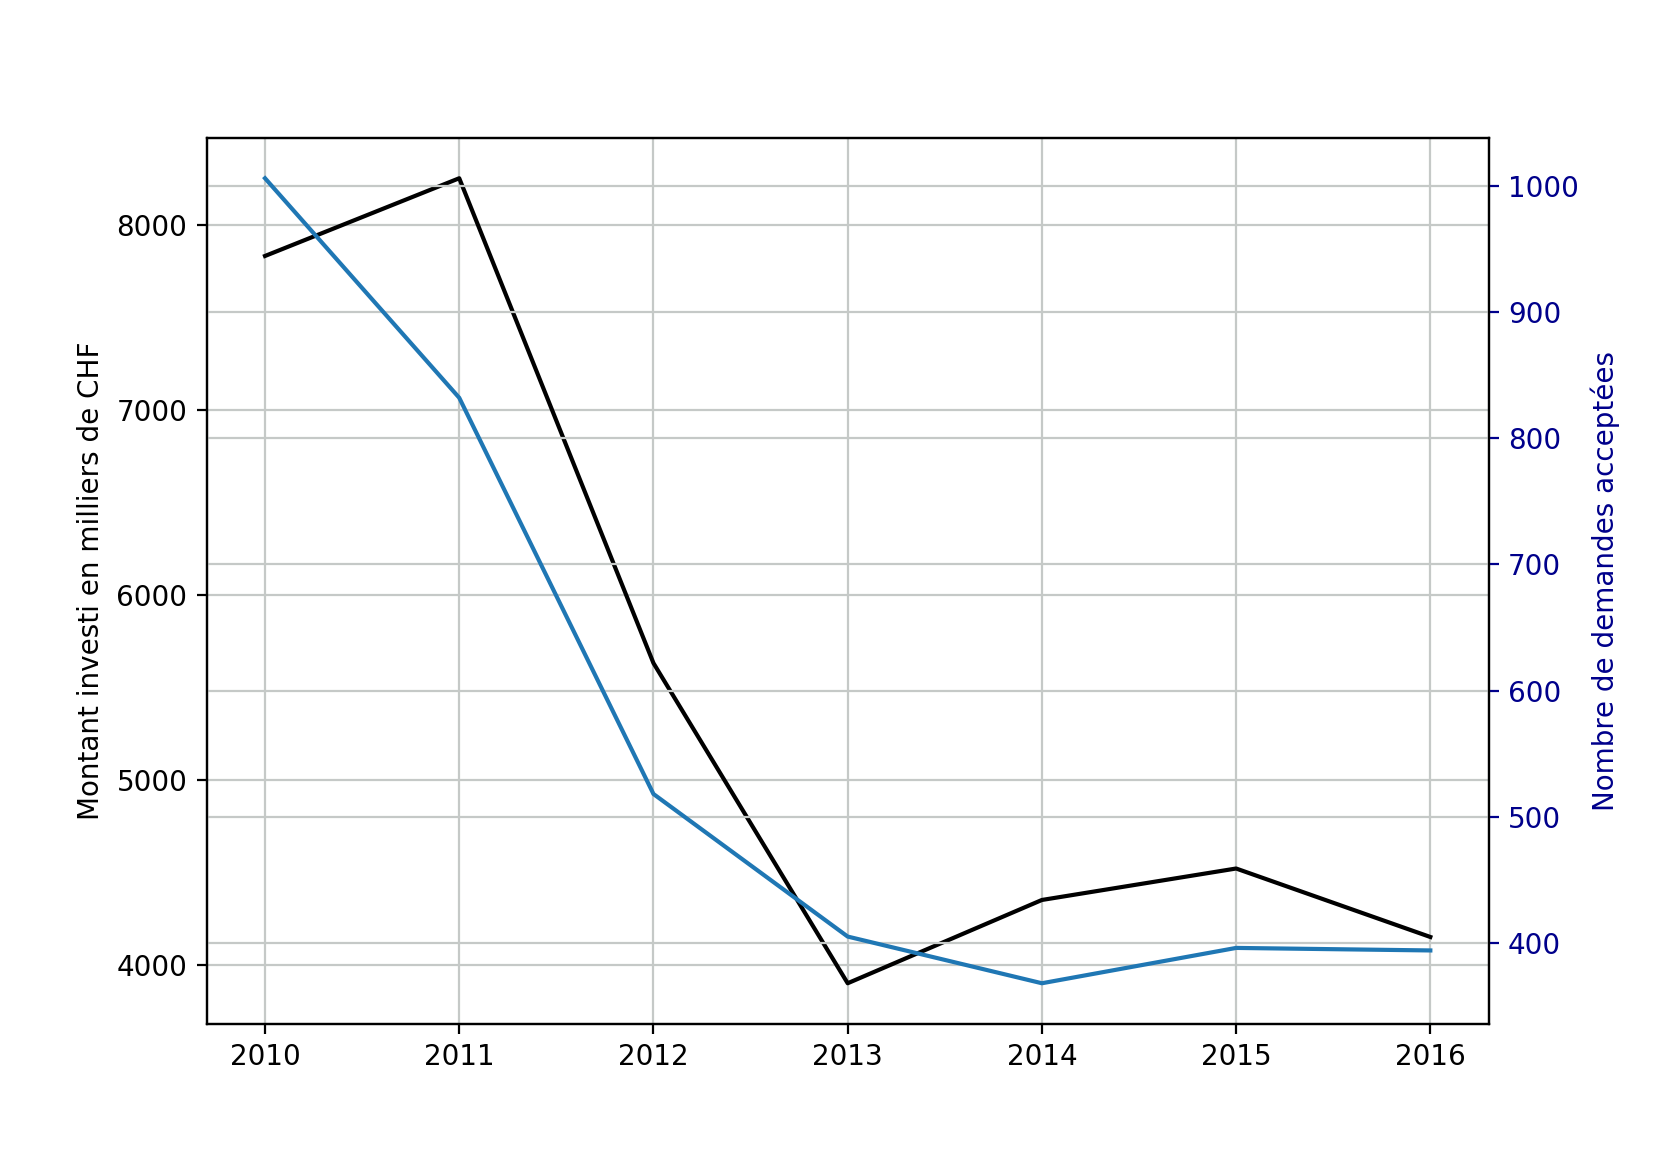

In [33]:
fig, ax1=plt.subplots()

ax1.plot(df_PB[df_PB['Région']=='Valais']['Année'],1000*df_PB[df_PB['Région']=='Valais']['Montant accordé (en M CHF)'],color='black')
plt.ylabel('Montant investi en milliers de CHF')
plt.grid(color='xkcd:silver')

ax2=ax1.twinx()
ax2.plot(df_PB[df_PB['Région']=='Valais']['Année'],df_PB[df_PB['Région']=='Valais']['Demandes de subvention acceptée'])
ax2.tick_params(colors='darkblue')
plt.ylabel('Nombre de demandes acceptées',color='darkblue')
plt.grid(color='xkcd:silver')